In [1]:
import re
import nltk 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [2]:
train  = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5279 entries, 0 to 5278
Data columns (total 4 columns):
unique_hash    5279 non-null object
text           5279 non-null object
drug           5279 non-null object
sentiment      5279 non-null int64
dtypes: int64(1), object(3)
memory usage: 165.0+ KB


In [6]:
train.head(3)

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,"Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy. I’m taking Tysabri and feel amazing,...",gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,"I can completely understand why you’d want to try it. But, results reported in lectures don’t always stand up to the scrutiny of peer-review during publication. There so much still to do before th...",gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,"Interesting that it only targets S1P-1/5 receptors rather than 1-5 like Fingolimod. Hoping to soon see what the AEs and SAEs were Yes. I'm not sure what this means, exactly: Quote Nine patients r...",fingolimod,2


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 3 columns):
unique_hash    2924 non-null object
text           2924 non-null object
drug           2924 non-null object
dtypes: object(3)
memory usage: 68.6+ KB


In [8]:
test.head(3)

,unique_hash,text,drug
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 55% switching to fingolimod",fingolimod
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 2015; the only way I can describe it any better is like feeling drunk but without having had a drink!!!,fingolimod
2,50b6d851bcff4f35afe354937949e9948975adf7,"Apparently it's shingles! :-/ I do have a few red spots just below my left breast which appeared a few days ago. Wasn't sure if they were connected or not, but showed them to the GP and he immedia...",humira


In [10]:
drugs=list(set(list(train['drug'].unique())+list(test['drug'].unique())))
print(drugs)

['ct-p13', 'necitumumab', 'keytruda', 'photodynamic therapy', 'tysabri', 'pan-retinal photocoagulation', 'aubagio', 'entyvio', 'imfinzi', 'remicade', 'filgotinib', 'durvalumab', 'flixabi', 'xalkori', 'macugen', 'stelara', 'osimertinib', 'pemetrexed disodium', 'ipilimumab', 'brigatinib', 'pegaptanib', 'cladribine', 'laser photocoagulation', 'renflexis', 'remsima', 'risankizumab', 'cimzia', 'alimta', 'pembrolizumab', 'ocrelizumab', 'tofacitinib', 'iressa', 'pemetrexed', 'ixifi', 'eylea', 'humira', 'cyltezo', 'crizotinib', 'dabrafenib', 'inflectra', 'tecentriq', 'vitrectomy', 'upadacitinib', 'trametinib', 'cyramza', 'ustekinumab', 'ketruda', 'movectro', 'stellara', 'aflibercept', 'gilenya', 'avastin', 'alecensa', 'bevacizumab', 'infliximab-dyyb', 'dexamethasone', 'teriflunomide', 'simponi', 'portrazza', 'mekinist', 'pf-00547659', 'alectnib', 'tagrisso', 'duvalumab', 'gefitinib', 'atezolizumab', 'siponimod', 'fingolimod', 'elotinib', 'rhumab 2h7', 'tafinlar', 'mavenclad', 'entrectinib', 'p

In [18]:
train['tidy_text'] = train['text'].str.replace("[^a-zA-Z#]", " ")

In [19]:
train.head(3)

,unique_hash,text,drug,sentiment,tidy_text
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,"Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy. I’m taking Tysabri and feel amazing,...",gilenya,2,Autoimmune diseases tend to come in clusters As for Gilenya if you feel good don t think about it it won t change anything but waste your time and energy I m taking Tysabri and feel amazing ...
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,"I can completely understand why you’d want to try it. But, results reported in lectures don’t always stand up to the scrutiny of peer-review during publication. There so much still to do before th...",gilenya,2,I can completely understand why you d want to try it But results reported in lectures don t always stand up to the scrutiny of peer review during publication There so much still to do before th...
2,fe809672251f6bd0d986e00380f48d047c7e7b76,"Interesting that it only targets S1P-1/5 receptors rather than 1-5 like Fingolimod. Hoping to soon see what the AEs and SAEs were Yes. I'm not sure what this means, exactly: Quote Nine patients r...",fingolimod,2,Interesting that it only targets S P receptors rather than like Fingolimod Hoping to soon see what the AEs and SAEs were Yes I m not sure what this means exactly Quote Nine patients r...


In [20]:
train['tidy_text'] = train['tidy_text'].str.lower()

In [21]:
pat = r'\b(?:{})\b'.format('|'.join(drugs))
train['tidy_text'] = train['tidy_text'].str.replace(pat, '')

In [22]:
train.head()

,unique_hash,text,drug,sentiment,tidy_text
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,"Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy. I’m taking Tysabri and feel amazing,...",gilenya,2,autoimmune diseases tend to come in clusters as for if you feel good don t think about it it won t change anything but waste your time and energy i m taking and feel amazing no symptoms ...
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,"I can completely understand why you’d want to try it. But, results reported in lectures don’t always stand up to the scrutiny of peer-review during publication. There so much still to do before th...",gilenya,2,i can completely understand why you d want to try it but results reported in lectures don t always stand up to the scrutiny of peer review during publication there so much still to do before th...
2,fe809672251f6bd0d986e00380f48d047c7e7b76,"Interesting that it only targets S1P-1/5 receptors rather than 1-5 like Fingolimod. Hoping to soon see what the AEs and SAEs were Yes. I'm not sure what this means, exactly: Quote Nine patients r...",fingolimod,2,interesting that it only targets s p receptors rather than like hoping to soon see what the aes and saes were yes i m not sure what this means exactly quote nine patients reported se...
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder where lemtrada and ocrevus sales would go, if they prove anti-cd20 are induction",ocrevus,2,very interesting grand merci now i wonder where and sales would go if they prove anti cd are induction
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain and Cervical Cord are in and my next Neurologist appointment is in the next couple of weeks. There’re no new lesions in Brain/Cord and I’ve had no rel...",gilenya,1,hi everybody my latest mri results for brain and cervical cord are in and my next neurologist appointment is in the next couple of weeks there re no new lesions in brain cord and i ve had no rel...


In [27]:
train['tidy_text'] = train['tidy_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [30]:
train.head(3)

,unique_hash,text,drug,sentiment,tidy_text
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,"Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy. I’m taking Tysabri and feel amazing,...",gilenya,2,autoimmune diseases tend come clusters feel good think about change anything waste your time energy taking feel amazing symptoms other than dodgy color vision since always know know will last mont...
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,"I can completely understand why you’d want to try it. But, results reported in lectures don’t always stand up to the scrutiny of peer-review during publication. There so much still to do before th...",gilenya,2,completely understand want results reported lectures always stand scrutiny peer review during publication there much still before this convincing hope that does work really aware happy with risks ...
2,fe809672251f6bd0d986e00380f48d047c7e7b76,"Interesting that it only targets S1P-1/5 receptors rather than 1-5 like Fingolimod. Hoping to soon see what the AEs and SAEs were Yes. I'm not sure what this means, exactly: Quote Nine patients r...",fingolimod,2,interesting that only targets receptors rather than like hoping soon what saes were sure what this means exactly quote nine patients reported serious adverse events serious adverse event reported ...


In [28]:
from nltk.corpus import stopwords
stop=stopwords.words('english')

In [31]:
stopword = r'\b(?:{})\b'.format('|'.join(stop))
train['tidy_text'] = train['tidy_text'].str.replace(stopword, '')

In [32]:
train.head(3)

,unique_hash,text,drug,sentiment,tidy_text
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,"Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy. I’m taking Tysabri and feel amazing,...",gilenya,2,autoimmune diseases tend come clusters feel good think change anything waste time energy taking feel amazing symptoms dodgy color vision since always know know last month year decade decided...
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,"I can completely understand why you’d want to try it. But, results reported in lectures don’t always stand up to the scrutiny of peer-review during publication. There so much still to do before th...",gilenya,2,completely understand want results reported lectures always stand scrutiny peer review publication much still convincing hope work really aware happy risks great think important present ...
2,fe809672251f6bd0d986e00380f48d047c7e7b76,"Interesting that it only targets S1P-1/5 receptors rather than 1-5 like Fingolimod. Hoping to soon see what the AEs and SAEs were Yes. I'm not sure what this means, exactly: Quote Nine patients r...",fingolimod,2,interesting targets receptors rather like hoping soon saes sure means exactly quote nine patients reported serious adverse events serious adverse event reported patient safety signals occ...


In [33]:
train_token = train['tidy_text'].apply(lambda x: x.split()) # tokenizing 
train_token.head()

0    [autoimmune, diseases, tend, come, clusters, feel, good, think, change, anything, waste, time, energy, taking, feel, amazing, symptoms, dodgy, color, vision, since, always, know, know, last, month...
1    [completely, understand, want, results, reported, lectures, always, stand, scrutiny, peer, review, publication, much, still, convincing, hope, work, really, aware, happy, risks, great, think, impo...
2    [interesting, targets, receptors, rather, like, hoping, soon, saes, sure, means, exactly, quote, nine, patients, reported, serious, adverse, events, serious, adverse, event, reported, patient, saf...
3                                                                                                                                  [interesting, grand, merci, wonder, sales, would, prove, anti, induction]
4    [everybody, latest, results, brain, cervical, cord, next, neurologist, appointment, next, couple, weeks, lesions, brain, cord, relapses, good, sign, line, cervical, cord, revi

In [34]:
for i in range(len(train_token)):
    train_token[i] = ' '.join(train_token[i])    
train['tidy_text'] = train_token

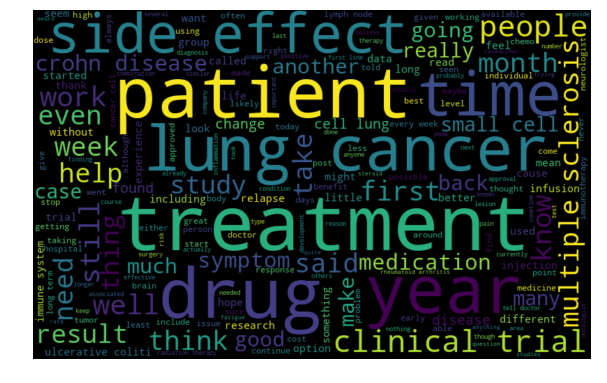

In [35]:
all_words = ' '.join([text for text in train['tidy_text']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [36]:
test['tidy_text'] = test['text'].str.replace("[^a-zA-Z#]", " ")
test['tidy_text'] = test['tidy_text'].str.lower()
test['tidy_text'] = test['tidy_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
test['tidy_text'] = test['tidy_text'].str.replace(pat, '')
test['tidy_text'] = test['tidy_text'].str.replace(stopword, '')

In [37]:
test.head(3)

,unique_hash,text,drug,tidy_text
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 55% switching to fingolimod",fingolimod,previously stable natalizumab switching
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 2015; the only way I can describe it any better is like feeling drunk but without having had a drink!!!,fingolimod,since december describe better like feeling drunk without drink
2,50b6d851bcff4f35afe354937949e9948975adf7,"Apparently it's shingles! :-/ I do have a few red spots just below my left breast which appeared a few days ago. Wasn't sure if they were connected or not, but showed them to the GP and he immedia...",humira,apparently shingles spots left breast appeared days sure connected showed immediately said shingles apparently left days late prescribe anything shingles prescribed useless amitryptiline ...


In [38]:
test_token = test['tidy_text'].apply(lambda x: x.split()) # tokenizing 
test_token.head()

0                                                                                                                                                               [previously, stable, natalizumab, switching]
1                                                                                                                                  [since, december, describe, better, like, feeling, drunk, without, drink]
2    [apparently, shingles, spots, left, breast, appeared, days, sure, connected, showed, immediately, said, shingles, apparently, left, days, late, prescribe, anything, shingles, prescribed, useless, ...
3    [docetaxel, week, weeks, week, claim, less, harsh, efficacy, every, weeks, diagnosed, stage, nsclc, egfr, also, positive, year, months, rociletinib, following, months, tarcrva, pulse, carboplatin,...
4    [worked, matter, days, willing, jump, hoops, probably, worth, considering, anti, stopped, working, another, ulcerative, colitis, next, surgery, scheduled, problems, skin, loop

In [39]:
for i in range(len(test_token)):
    test_token[i] = ' '.join(test_token[i])    
test['tidy_text'] = test_token

In [40]:
test.head(3)

,unique_hash,text,drug,tidy_text
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 55% switching to fingolimod",fingolimod,previously stable natalizumab switching
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 2015; the only way I can describe it any better is like feeling drunk but without having had a drink!!!,fingolimod,since december describe better like feeling drunk without drink
2,50b6d851bcff4f35afe354937949e9948975adf7,"Apparently it's shingles! :-/ I do have a few red spots just below my left breast which appeared a few days ago. Wasn't sure if they were connected or not, but showed them to the GP and he immedia...",humira,apparently shingles spots left breast appeared days sure connected showed immediately said shingles apparently left days late prescribe anything shingles prescribed useless amitryptiline probably ...


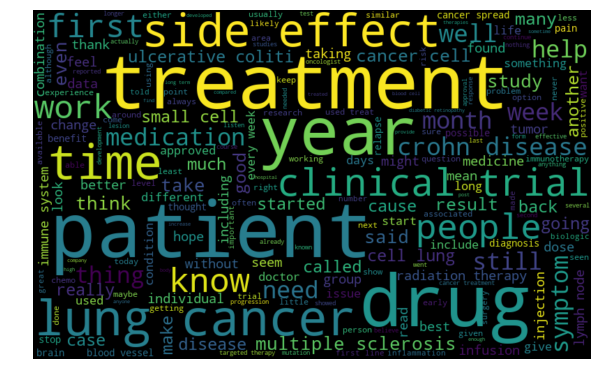

In [41]:
all_words_test = ' '.join([text for text in test['tidy_text']]) 
wordcloud_test = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_test) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud_test, interpolation="bilinear") 
plt.axis('off') 
plt.show()

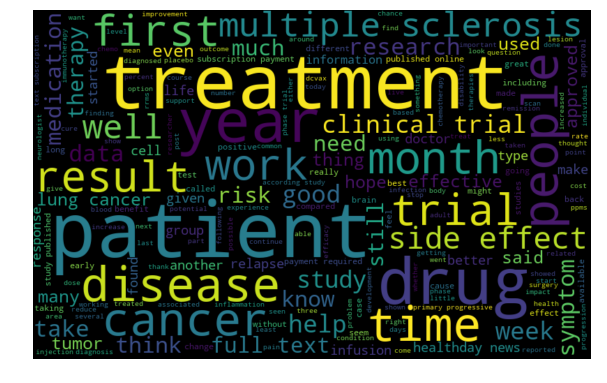

In [43]:
positive_words = ' '.join([text for text in train['tidy_text'][train['sentiment']==0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

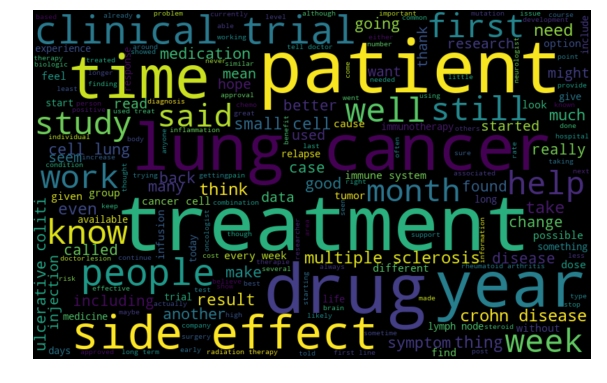

In [44]:
negative_words = ' '.join([text for text in train['tidy_text'][train['sentiment']==2]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 

In [46]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
bow = bow_vectorizer.fit_transform(train['tidy_text']) 
bow.shape

(5279, 1000)

In [47]:
bow_test = bow_vectorizer.fit_transform(test['tidy_text']) 
bow_test.shape

(2924, 1000)

In [49]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(train['tidy_text']) 
tfidf_test = tfidf_vectorizer.fit_transform(test['tidy_text']) 
tfidf.shape,tfidf_test.shape

((5279, 1000), (2924, 1000))

In [54]:
labels=train['sentiment']

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [51]:
x_train,x_test,y_train,y_test = train_test_split(tfidf,train['sentiment'],shuffle=False)

In [56]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler

In [62]:
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer

In [63]:
model = LinearSVC('l2')
normalize = Normalizer()
x_train = normalize.fit_transform(x_train)
x_test = normalize.transform(x_test)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [66]:
print(f1_score(y_test, y_pred,average='macro'))

0.42563338504677145


In [73]:
test_pred = model.predict(tfidf_test) 
test_pred_int = list(test_pred)

In [75]:
submission = pd.DataFrame(test['unique_hash'],columns=['unique_hash'])
submission['sentiment']=test_pred_int

In [76]:
submission.head()

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,1
2,50b6d851bcff4f35afe354937949e9948975adf7,1
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


In [77]:
submission.to_csv('sub2.csv', index=False) # writing data to a CSV file

In [67]:
model = LinearSVC('l2')
x_train_bow,x_test_bow,y_train_bow,y_test_bow = train_test_split(bow,labels,test_size=0.25,random_state=0)
normalize = Normalizer()
x_train_bow = normalize.fit_transform(x_train_bow)
x_test_bow = normalize.transform(x_test_bow)
model.fit(x_train_bow,y_train_bow)
y_pred_bow = model.predict(x_test_bow)

In [68]:
print(f1_score(y_test_bow, y_pred_bow,average='macro'))

0.3916561924850263


In [69]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(x_train, y_train) 
prediction = rf.predict(x_test) 
f1_score(y_test, prediction,average='macro')

0.2951680339728149

In [82]:
model = LinearSVC('l1',dual=False)
normalize = Normalizer()
x_train = normalize.fit_transform(x_train)
x_test = normalize.transform(x_test)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [83]:
print(f1_score(y_test, y_pred,average='macro'))

0.4137247933602257


In [84]:
test_pred = model.predict(tfidf_test) 
test_pred_int = list(test_pred)

In [85]:
submission = pd.DataFrame(test['unique_hash'],columns=['unique_hash'])
submission['sentiment']=test_pred_int

In [86]:
submission.head()

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,1
2,50b6d851bcff4f35afe354937949e9948975adf7,1
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


In [87]:
submission.to_csv('sub3.csv', index=False) # writing data to a CSV file

In [95]:
model = LinearSVC('l2')
normalize = Normalizer()
x_train = normalize.fit_transform(tfidf)
x_test = normalize.transform(tfidf_test)
model.fit(x_train,labels)
y_pred = model.predict(x_test)

In [96]:
test_pred=list(y_pred)

In [97]:
submission = pd.DataFrame(test['unique_hash'],columns=['unique_hash'])
submission['sentiment']=test_pred

In [98]:
submission.head()

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,1
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


In [99]:
submission.to_csv('sub5.csv', index=False) # writing data to a CSV file

In [114]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

In [115]:
import gensim

In [116]:
def add_label(txt):
    output = []
    for i, s in zip(txt.index, txt):
        output.append(LabeledSentence(s, ["txt" + str(i)]))
    return output

In [117]:
train_token = train['tidy_text'].apply(lambda x: x.split()) # tokenizing 
test_token = test['tidy_text'].apply(lambda x: x.split()) # tokenizing 

In [118]:
label_train = add_label(train_token) 
label_test = add_label(test_token) 

In [119]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors  
                                  vector_size=200, # no. of desired features                                  
                                  window=5, # width of the context window                                  
                                  negative=7, # if > 0 then negative sampling will be used                                 
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores                                  
                                  alpha=0.1, # learning rate                                  
                                  seed = 23) 

In [126]:
model_d2v_test = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors  
                                  vector_size=200, # no. of desired features                                  
                                  window=5, # width of the context window                                  
                                  negative=7, # if > 0 then negative sampling will be used                                 
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores                                  
                                  alpha=0.1, # learning rate                                  
                                  seed = 23) 

In [120]:
all_labels=label_train+label_test

In [121]:
model_d2v.build_vocab([i for i in tqdm(all_labels)])

100%|███████████████████████████████████████████████████████| 8203/8203 [00:00<00:00, 1172101.78it/s]


In [123]:
model_d2v.train(label_train, total_examples= len(train['tidy_text']), epochs=15)

In [127]:
model_d2v_test.build_vocab([i for i in tqdm(all_labels)])

100%|███████████████████████████████████████████████████████| 8203/8203 [00:00<00:00, 1025632.73it/s]


In [128]:
model_d2v_test.train(label_test, total_examples= len(test['tidy_text']), epochs=15)

In [130]:
docvec_arrays = np.zeros((len(train_token), 200)) 
for i in range(len(train)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(5279, 200)

In [131]:
docvec_arrays_test = np.zeros((len(test_token), 200)) 
for i in range(len(test)):
    docvec_arrays_test[i,:] = model_d2v_test.docvecs[i].reshape((1,200))    

docvec_test = pd.DataFrame(docvec_arrays_test) 
docvec_test.shape

(2924, 200)

In [133]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression(random_state=0,solver='lbfgs',max_iter=2000,multi_class='auto')

In [134]:
xdoc,xtdoc,ydoc,ytdoc = train_test_split(docvec_df,train['sentiment'],shuffle=False)

In [135]:
xdoc = normalize.fit_transform(xdoc)
xtdoc = normalize.transform(xtdoc)
model.fit(xdoc,ydoc)
y_pred = model.predict(xtdoc)

In [136]:
print(f1_score(ytdoc, y_pred,average='macro'))

0.3173645218801889


In [138]:
x=normalize.fit_transform(docvec_df)
xt=normalize.fit_transform(docvec_test)
model.fit(x,labels)
y_pre=model.predict(xt)

In [141]:
submission = pd.DataFrame(test['unique_hash'],columns=['unique_hash'])
submission['sentiment']=y_pre

In [142]:
submission.head()

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,2
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


In [144]:
set(y_pre)

{0, 1, 2}

In [145]:
submission.to_csv('sub6.csv', index=False) # writing data to a CSV file